In [92]:
# import the data
import os
import pandas as pd
# df = pd.read_csv('/Users/julianalverio/Desktop/lending-club-loan-data/loan.csv', low_memory=False)
df = pd.read_csv('/home/ubuntu/machine_learning_aws/data/loan.csv', low_memory=False, nrows=100000)

FileNotFoundError: File b'/home/ubuntu/machine_learning_aws/data/loan.csv' does not exist

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# rename some of the columns to make column names more readable
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [5]:
# Lets' transform the issue dates by year.
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

In [6]:
# Let's make a "loan_condition" column, and label all the loans as "Bad Loan" or "Good Loan"
import numpy as np
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

In [7]:
# make an income_category column
df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

In [8]:
# prepare to plot things
import matplotlib
%matplotlib inline

# Exercise 1: Visualizing Data

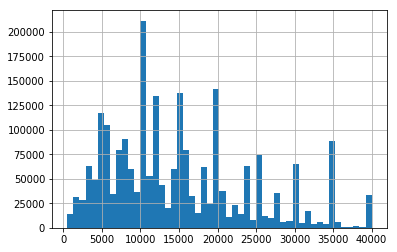

In [9]:
# TODO: plot the amount of money the lender requested: "loan_amount"
df["loan_amount"].hist(bins=50)

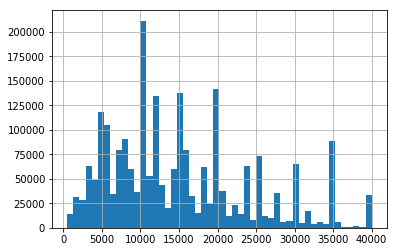

In [10]:
# TODO: plot the amount of money the lenders received: "funded_amount"
df["funded_amount"].hist(bins=50)

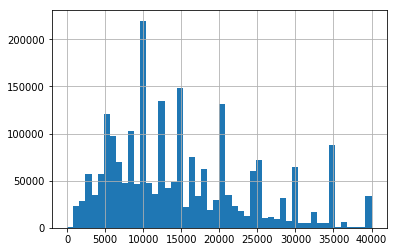

In [11]:
# TODO: plot the amount of money the investors gave: "investor_funds"
df['investor_funds'].hist(bins=50)

### Class Discussion: Were the three data fields similarly distributed? If so, what can we conclude?

In [13]:
# TODO: create a new dataframe called "low_income", where it only has rows that have "Low" in the "income_category" field
low_income = df[df['income_category'] == 'Low']

In [14]:
# TODO: create a new dataframe called "high_income" where it only has rows that have "High" in the "income_category" field
high_income = df[df['income_category'] == 'High']

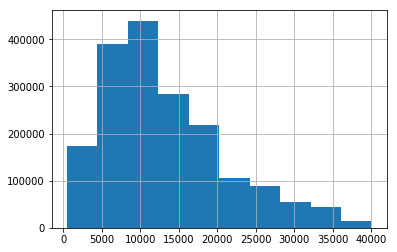

In [15]:
# TODO: plot the "loan_amount" column for the low_income dataframe you created
low_income['loan_amount'].hist()

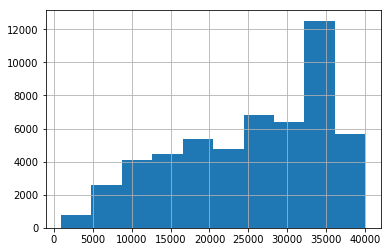

In [16]:
# TODO: plot the "loan_amount" column for the high_income dataframe you created
high_income['loan_amount'].hist()

# Exercise 2: Feature Engineering
Disclaimer: The feature engineering in this notebook is for instructional purposes and is intentionally not optimized

In [17]:
# let's get rid of some features we don't want to work with right now
keep_features = ['loan_amount', 'term', 'interest_rate', 'installment', 'grade',
       'home_ownership', 'income_category', 'verification_status', 'pymnt_plan',
       'purpose', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'revol_util', 'total_acc', 'loan_condition', 'addr_state']
drop_features = list()
for feature in list(df):
    if feature not in keep_features:
        drop_features.append(feature)
df.drop(drop_features, axis=1, inplace=True)

In [18]:
# this seems like an interesting feature, but let's ignore it for now
df.drop(['addr_state'], axis=1, inplace=True)

In [19]:
# TODO: write a loop to make one-hot encodings from each the features in categorical_features, and puts the dataframes 
# in a list. Call that list dummies_list
# hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

categorical_features = ['term', 'grade', 'home_ownership', 'income_category', 'verification_status',
                        'purpose', 'pymnt_plan']

dummies_list = list()
for categorical_feature in categorical_features:
    dummies = pd.get_dummies(df[categorical_feature])
    dummies_list.append(dummies)


In [20]:
# concatenate together all the dummies you made
all_dummies = pd.concat(dummies_list, axis=1)

In [21]:
# add the dummy features you made to the dataset
complete_df = pd.concat([df, all_dummies], axis=1)

In [27]:
# drop all the old features
complete_df.drop(categorical_features, axis=1, inplace=True)

In [68]:
# Let's fill in zeros for now. There seems to be a better way to do this. Can you think of one?
complete_df = complete_df.fillna(0)

### Now you understand how to handle categorical variables! Continuous variables are easier. For an example of binning, we could've directly passed in the income, but we instead created "low", "medium", and "high" bins. Alternatively, we could have normalized the income and passed it in directly. 

In [23]:
# HOMEWORK TODO: normalize the loan_amount field so that all the values are between zero and one.



In [24]:
# HOMEWORK TODO: practice binning any one of our discrete variables


# Exercise 3: Simple Neural Networks

In [70]:
# import sklearn's neural network classifier. Note, you should generally use Tensorflow or Pytorch. 
# This is only for instructional purposes.
from sklearn.neural_network import MLPClassifier

In [71]:
# for splitting into a train and test set
from sklearn.model_selection import train_test_split

In [72]:
# convert the labels to 0/1
labels = complete_df['loan_condition']
labels = labels.apply(lambda x: 1 if x == 'Good Loan' else 0)
labels = np.array(labels)

In [73]:
# drop the labels so it's not in our data
data = complete_df.drop(['loan_condition'], inplace=False, axis=1)

In [74]:
# make sure we're only working with numpy arrays
data = np.array(data)

In [75]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [76]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [77]:
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [78]:
# a convenient way to compute accuracy
from sklearn.metrics import accuracy_score

In [82]:
predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8681165318246361


## Great accuracy! It seems a little too good. Can you think of why this accuracy might be deceptive?

# Exercise 4: Implementing Logistic Regression Hyperparameter Search

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import random

In [91]:
# Hyperparameters to randomly choose from

# TODO: randomly sample a C value, called rand_C


# TODO: randomly_sample a fit_intercept boolean, called rand_fit_intercept


# TODO randomly_sample a penalty and call it rand_penalty


# Create model using randomly-selected hyperparameters
model = LogisticRegression(random_state=1, C=rand_C, fit_intercept = rand_fit_intercept, penalty=rand_penalty)

# Train the model, make predictions, and evaluate the model
model.fit(x_train, y_train)
preds = model.predict_proba(x_test)[:,1]
score = roc_auc_score(y_test, preds)

print(score)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7023354321867953
